In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [172]:
creditcard = pd.read_csv('creditcard.csv')

In [173]:
card_df = pd.DataFrame(creditcard)
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [174]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [175]:
card_df['Class'].value_counts(normalize=True) 

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

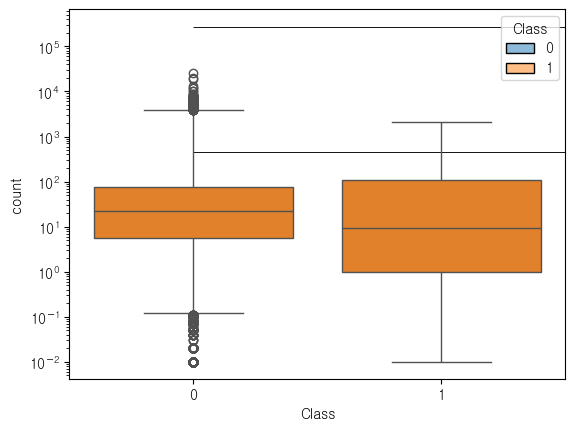

In [176]:
sns.countplot(x='Class', data=card_df)  # 클래스 분포
sns.histplot(data=card_df, x='Amount', hue='Class', bins=50, log_scale=(False, True))
sns.boxplot(x='Class', y='Amount', data=card_df)

In [177]:
# IQR 기반 이상치 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [178]:
normal = card_df[card_df['Class'] == 0]
fraud = card_df[card_df['Class'] == 1]
normal_filtered = remove_outliers_iqr(normal, 'Amount')
filtered_df = pd.concat([normal_filtered, fraud], axis=0).reset_index(drop=True)
print(f"제거 전: {len(card_df)} rows")
print(f"제거 후: {len(filtered_df)} rows")

IQR: 71.40
Lower Bound: -101.45
Upper Bound: 184.15
제거 전: 284807 rows
제거 후: 252945 rows


In [179]:
print(filtered_df['Class'].value_counts())
print(filtered_df['Class'].value_counts(normalize=True))

Class
0    252453
1       492
Name: count, dtype: int64
Class
0    0.998055
1    0.001945
Name: proportion, dtype: float64


In [180]:
from sklearn.preprocessing import StandardScaler

filtered_df['scaled_amount'] = StandardScaler().fit_transform(filtered_df['Amount'].values.reshape(-1, 1))
filtered_df['scaled_time'] = StandardScaler().fit_transform(filtered_df['Time'].values.reshape(-1, 1))
filtered_df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [181]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

V17   -0.338907
V14   -0.315810
V12   -0.272855
V7    -0.231969
V10   -0.230452
V16   -0.215057
V3    -0.212084
V11    0.163727
V4     0.144193
V18   -0.120430
Name: Class, dtype: float64


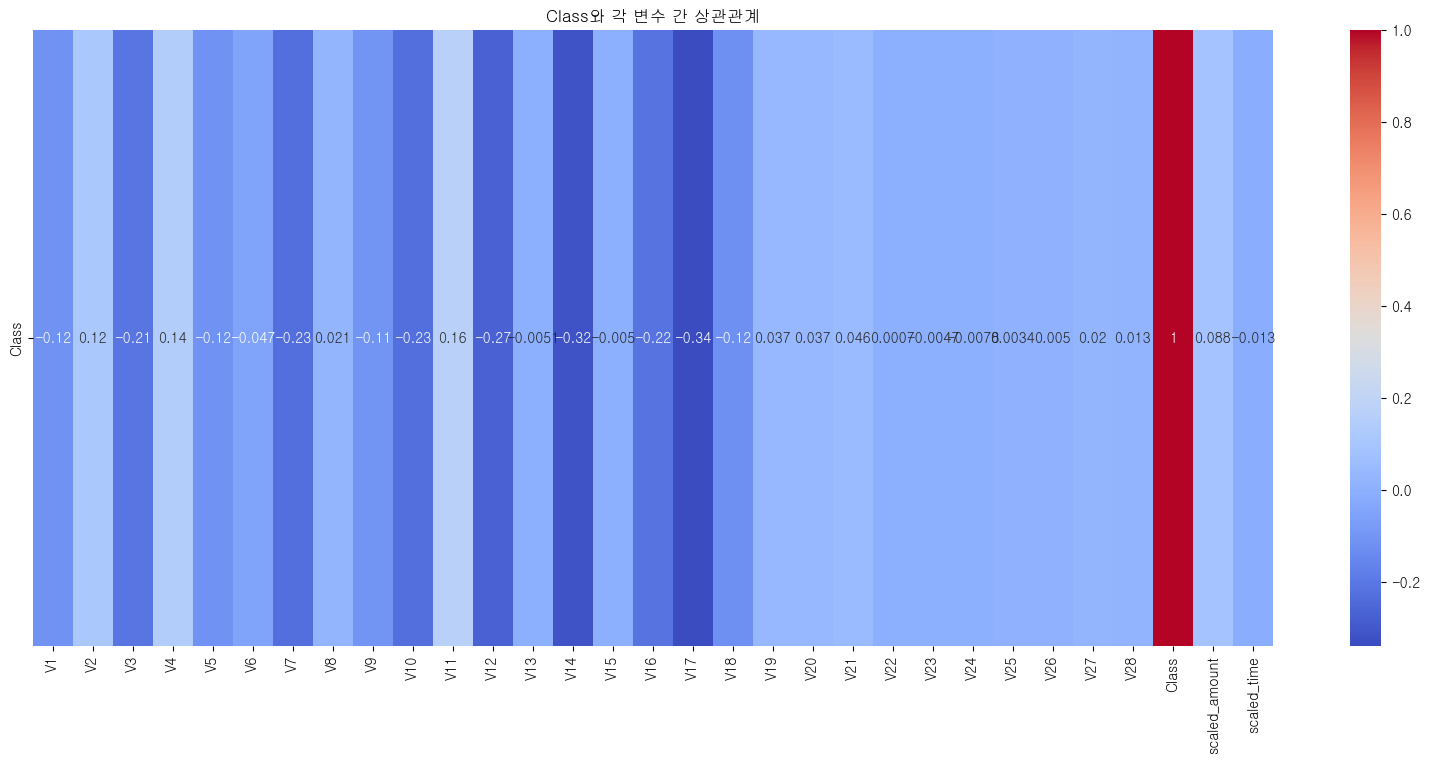

In [182]:
# 상관관계 행렬 계산
corr_matrix = filtered_df.corr()

# 타겟 변수(Class)와의 상관관계만 추출
target_corr = corr_matrix['Class'].drop('Class').sort_values(key=abs, ascending=False)

# 상위 상관 변수 출력
print(target_corr.head(10))  # 중요 변수 확인

# 히트맵 시각화
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix[['Class']].T, annot=True, cmap='coolwarm')
plt.title('Class와 각 변수 간 상관관계')
plt.show()

In [183]:
X = filtered_df.drop('Class', axis=1)
y = filtered_df['Class']

In [184]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def evaluate_model(model, X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    proba = xgb.predict_proba(X_test)[:,1]

    print(f"\n[{name}]")
    print(classification_report(y_test, pred))
    print("Accuracy:", accuracy_score(y_test, pred))
    print("ROC-AUC:", roc_auc_score(y_test, proba))

# 1. 로지스틱 회귀
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X, y, "로지스틱 회귀")

# 2. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb, X, y, "XGBoost")

# 3. RandomForest
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X, y, "RandomForest")

# 4. lightGBM
lgbm = LGBMClassifier(random_state=42)
evaluate_model(lgbm, X, y, "lightGBM")


[로지스틱 회귀]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.90      0.67      0.77        98

    accuracy                           1.00     50589
   macro avg       0.95      0.84      0.89     50589
weighted avg       1.00      1.00      1.00     50589

Accuracy: 0.9992290814208622
ROC-AUC: 0.9777666983689556

[XGBoost]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.95      0.81      0.87        98

    accuracy                           1.00     50589
   macro avg       0.98      0.90      0.94     50589
weighted avg       1.00      1.00      1.00     50589

Accuracy: 0.9995453557097392
ROC-AUC: 0.9777666983689556

[RandomForest]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.96      0.82      0.88        98

    accuracy                  

- 로지스틱 회귀:

    Recall이 낮음 (0.64) -> 사기를 자주 놓침

    Precision은 높은 편

    비선형 경계에는 약함

- RandomForest:

    전형적으로 강한 성능, Recall과 Precision 균형 잘 맞춤

- XGBoost:

    성능 최고

    Recall(0.85), Precision(0.94) 모두 뛰어남 -> 실전에서 사기 잘 잡는 모델

    F1-score = 0.89 → 최고 성능

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    early_stopping_rounds=40,
    verbose=False
)

pred = xgb.predict(X_test)
proba = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred))
print("f1-score:", f1_score(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.98      0.81      0.88        98

    accuracy                           1.00     50589
   macro avg       0.99      0.90      0.94     50589
weighted avg       1.00      1.00      1.00     50589

f1-score: 0.88268156424581
ROC-AUC: 0.9706872390674595


In [186]:
confusion_matrix(y_test, pred)

array([[50489,     2],
       [   19,    79]])

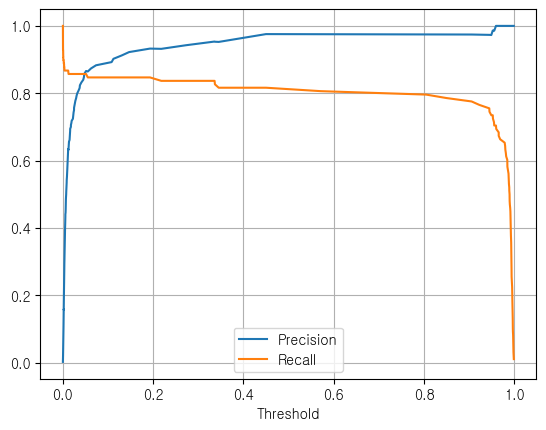

In [187]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, proba)

# 시각화해서 최적 균형점 찾기
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.show()

In [188]:
f1_scores = [f1_score(y_test, proba >= thr) for thr in thresholds]
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-score: {best_f1:.4f}")

Best Threshold: 0.3360
Best F1-score: 0.8913


In [189]:
best_pred = (proba >= best_threshold).astype(int)

print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.95      0.84      0.89        98

    accuracy                           1.00     50589
   macro avg       0.98      0.92      0.95     50589
weighted avg       1.00      1.00      1.00     50589



In [190]:
confusion_matrix(y_test, best_pred)

array([[50487,     4],
       [   16,    82]])

In [191]:
from sklearn.metrics import precision_score, recall_score, f1_score

# threshold=0.5일 때
pred_05 = (proba >= 0.5).astype(int)
precision_05 = precision_score(y_test, pred_05)
recall_05 = recall_score(y_test, pred_05)
f1_05 = f1_score(y_test, pred_05)

# best threshold일 때
pred_best = (proba >= best_threshold).astype(int)
precision_best = precision_score(y_test, pred_best)
recall_best = recall_score(y_test, pred_best)
f1_best = f1_score(y_test, pred_best)

# 비교표 만들기
comparison_df = pd.DataFrame({
    'Threshold': ['0.5', f'{best_threshold:.4f}'],
    'Precision': [precision_05, precision_best],
    'Recall': [recall_05, recall_best],
    'F1-score': [f1_05, f1_best]
})

print(comparison_df)

  Threshold  Precision    Recall  F1-score
0       0.5   0.975309  0.806122  0.882682
1    0.3360   0.953488  0.836735  0.891304


## 오버샘플링

In [212]:
from imblearn.over_sampling import SMOTE

X = filtered_df.drop('Class', axis=1)
y = filtered_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_over = XGBClassifier(
    random_state=42,
    use_label_encoder=False
)
xgb_over.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    verbose=False
)

over_pred = xgb_over.predict(X_test)
over_proba = xgb_over.predict_proba(X_test)[:, 1]

print("평가 결과")
print(classification_report(y_test, over_pred))
print("ROC-AUC:", roc_auc_score(y_test, over_proba))

평가 결과
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.85      0.87      0.86        98

    accuracy                           1.00     50589
   macro avg       0.92      0.93      0.93     50589
weighted avg       1.00      1.00      1.00     50589

ROC-AUC: 0.9743591401821864


In [213]:
confusion_matrix(y_test, over_pred)

array([[50476,    15],
       [   13,    85]])

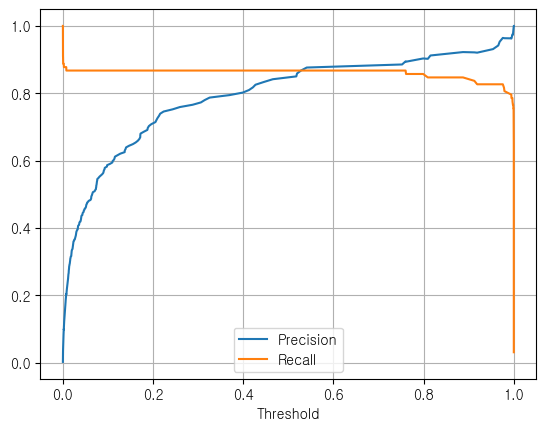

In [214]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, over_proba)

# 시각화해서 최적 균형점 찾기
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.show()

In [203]:
def evaluate_model(model, X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    model.fit(X_train_smote, y_train_smote)

    pred = model.predict(X_test)
    proba = xgb.predict_proba(X_test)[:,1]

    print(f"\n[{name}]")
    print(classification_report(y_test, pred))
    print("Accuracy:", accuracy_score(y_test, pred))
    print("ROC-AUC:", roc_auc_score(y_test, proba))

# 1. 로지스틱 회귀
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X, y, "로지스틱 회귀")

# 2. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb, X, y, "XGBoost")

# 3. RandomForest
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X, y, "RandomForest")

# 4. lightGBM
lgbm = LGBMClassifier(random_state=42)
evaluate_model(lgbm, X, y, "lightGBM")


[로지스틱 회귀]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50491
           1       0.09      0.87      0.17        98

    accuracy                           0.98     50589
   macro avg       0.55      0.93      0.58     50589
weighted avg       1.00      0.98      0.99     50589

Accuracy: 0.9830200241159145
ROC-AUC: 0.9706872390674595

[XGBoost]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.85      0.87      0.86        98

    accuracy                           1.00     50589
   macro avg       0.92      0.93      0.93     50589
weighted avg       1.00      1.00      1.00     50589

Accuracy: 0.9994465199944652
ROC-AUC: 0.9743591401821864

[RandomForest]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.92      0.82      0.86        98

    accuracy                  

In [217]:
lgbm_over = LGBMClassifier(
    random_state=42,
)
lgbm_over.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    verbose=False
)

over_pred = lgbm_over.predict(X_test)
over_proba = lgbm_over.predict_proba(X_test)[:, 1]

print("평가 결과")
print(classification_report(y_test, over_pred))
print("ROC-AUC:", roc_auc_score(y_test, over_proba))

평가 결과
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50491
           1       0.70      0.85      0.76        98

    accuracy                           1.00     50589
   macro avg       0.85      0.92      0.88     50589
weighted avg       1.00      1.00      1.00     50589

ROC-AUC: 0.9750345484889407


In [218]:
confusion_matrix(y_test, over_pred)

array([[50455,    36],
       [   15,    83]])